In [1]:
from sktime.experiments.orchestrator import Orchestrator
from sktime.model_selection import Single_Split
from sktime.highlevel import Task, TSCStrategy
from sktime.datasets import load_gunpoint
from sktime.classifiers.ensemble import TimeSeriesForestClassifier
import pandas as pd

from sktime.highlevel import DataHolder

In [2]:
import numpy as np 
from sktime.highlevel import Result

from sktime.analyze_results import AnalyseResults
from sktime.analyze_results.scores import ScoreMSE

#### Orchestrator example

In [3]:
train = load_gunpoint(split='TRAIN')
test = load_gunpoint(split='TEST')
data = pd.concat([train,test], axis=0)
task = Task(case='TSC', data=data, dataset_name='gunpoint',target='label')
dh = DataHolder(data=data, task=task, dataset_name='GunPoint')

clf = TimeSeriesForestClassifier()
strategy = TSCStrategy(clf)

orchestrator = Orchestrator(data_holders=[dh], strategies=[strategy], resampling=Single_Split())


results = orchestrator.run()

#### Benchmarking example

In [4]:

result1 = Result(dataset_name='Dts1',
                 strategy_name='Strat1', 
                 true_labels=np.random.normal(size=100),
                 predictions=np.random.normal(size=100))

result2 = Result(dataset_name='Dts1',
                 strategy_name='Strat2', 
                 true_labels=np.random.normal(size=100),
                 predictions=np.random.normal(size=100))


result3 = Result(dataset_name='Dts1',
                 strategy_name='Strat3', 
                 true_labels=np.random.normal(size=100),
                 predictions=np.random.normal(size=100))


result4 = Result(dataset_name='Dts1',
                 strategy_name='Strat4', 
                 true_labels=np.random.normal(size=100),
                 predictions=np.random.normal(size=100))


result5 = Result(dataset_name='Dts2',
                 strategy_name='Strat1', 
                 true_labels=np.random.normal(size=100),
                 predictions=np.random.normal(size=100))

result6 = Result(dataset_name='Dts2',
                 strategy_name='Strat2', 
                 true_labels=np.random.normal(size=100),
                 predictions=np.random.normal(size=100))


result7 = Result(dataset_name='Dts2',
                 strategy_name='Strat3', 
                 true_labels=np.random.normal(size=100),
                 predictions=np.random.normal(size=100))


result8 = Result(dataset_name='Dts2',
                 strategy_name='Strat4', 
                 true_labels=np.random.normal(size=100),
                 predictions=np.random.normal(size=100))


results = [result1, result2, result3, result4, result5, result6, result7, result8]

In [5]:
analyse = AnalyseResults(results)
losseses_per_estimator, losses_per_dataset_per_estimator = analyse.prediction_errors(metric=ScoreMSE())

In [6]:
losses_per_dataset_per_estimator

loss  std_error
Dts1 Strat1  1.77222    0.22713
     Strat2  1.95175    0.25123
     Strat3  2.07347    0.31767
     Strat4  2.30564    0.28248
Dts2 Strat1  2.97124    0.48347
     Strat2  1.78335    0.22358
     Strat3  2.10390    0.27426
     Strat4  1.82010    0.30107

In [7]:
analyse.ranks(losseses_per_estimator)

,avg_rank
Strat2,1.5
Strat1,2.5
Strat3,3.0
Strat4,3.0


In [8]:
_, t_df = analyse.t_test(losseses_per_estimator)
t_df

Strat1        Strat2        Strat3        Strat4       
       t_stat  p_val t_stat  p_val t_stat  p_val t_stat  p_val
Strat1  0.000  1.000  0.833  0.493  0.472  0.683  0.478  0.680
Strat2 -0.833  0.493  0.000  1.000 -2.584  0.123 -0.760  0.527
Strat3 -0.472  0.683  2.584  0.123  0.000  1.000  0.106  0.925
Strat4 -0.478  0.680  0.760  0.527 -0.106  0.925  0.000  1.000

In [9]:
_, s_df = analyse.sign_test(losseses_per_estimator)
s_df

estimator_2,Strat1,Strat2,Strat3,Strat4
estimator_1,,,,
Strat1,0.5,1.0,1.0,1.0
Strat2,1.0,0.5,0.5,0.5
Strat3,1.0,0.5,0.5,1.0
Strat4,1.0,0.5,1.0,0.5


In [10]:
_, r_df = analyse.ranksum_test(losseses_per_estimator)
r_df

Strat1       Strat2        Strat3        Strat4       
       t_stat p_val t_stat  p_val t_stat  p_val t_stat  p_val
Strat1    0.0   1.0  0.000  1.000  0.000  1.000  0.000  1.000
Strat2    0.0   1.0  0.000  1.000 -1.549  0.121 -0.775  0.439
Strat3    0.0   1.0  1.549  0.121  0.000  1.000  0.000  1.000
Strat4    0.0   1.0  0.775  0.439  0.000  1.000  0.000  1.000

In [11]:
analyse.t_test_with_bonferroni_correction(losseses_per_estimator)

,Strat1,Strat2,Strat3,Strat4
Strat1,False,False,False,False
Strat2,False,False,False,False
Strat3,False,False,False,False
Strat4,False,False,False,False


In [12]:
_, w_df = analyse.wilcoxon_test(losseses_per_estimator)
w_df

/media/viktor/Data/PhD/sktime/venv_sktime/lib/python3.6/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/media/viktor/Data/PhD/sktime/venv_sktime/lib/python3.6/site-packages/scipy/stats/morestats.py:2803: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
/media/viktor/Data/PhD/sktime/venv_sktime/lib/python3.6/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/media/viktor/Data/PhD/sktime/venv_sktime/lib/python3.6/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/media/viktor/Data/PhD/sktime/venv_sktime/lib/python3.6/site-pack

Strat1           Strat2           Strat3           Strat4       
       statistic  p_val statistic  p_val statistic  p_val statistic  p_val
Strat1       0.0    NaN       1.0  0.655       1.0  0.655       1.0  0.655
Strat2       1.0  0.655       0.0    NaN       0.0  0.180       0.0  0.180
Strat3       1.0  0.655       0.0  0.180       0.0    NaN       1.0  0.655
Strat4       1.0  0.655       0.0  0.180       1.0  0.655       0.0    NaN

In [13]:
_, f_df = analyse.friedman_test(losseses_per_estimator)
f_df

,statistic,p_value
0,1.8,0.615


In [14]:
analyse.nemenyi(losseses_per_estimator)

,Strat1,Strat2,Strat3,Strat4
Strat1,-1.000,0.945,0.983,0.998
Strat2,0.945,-1.000,0.791,0.881
Strat3,0.983,0.791,-1.000,0.998
Strat4,0.998,0.881,0.998,-1.000


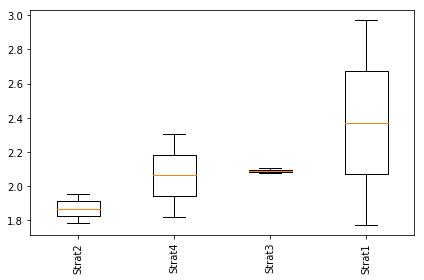

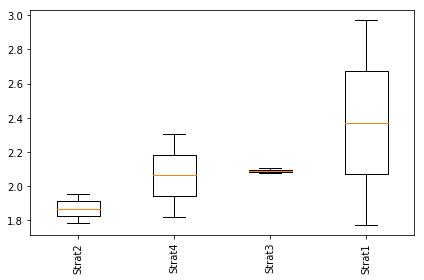

In [15]:
analyse.plot_boxcharts(losseses_per_estimator)